# lab7 & 8

In [126]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (6,3)

# import library
import pickle

## lab7: Event selection optimization

In [127]:
# open the file of interest, and use pickle loading
infile1 = open ("higgs_100000_pt_1000_1200.pkl",'rb')
new_dict1 = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
new_dict2 = pickle.load(infile2)

In [128]:
# import data into array variable
higgs_data = np.array(new_dict1)
qcd_data = np.array(new_dict2)

"higgs" -- signal dataset

"qcd" -- background dataset

In [129]:
# a brief table of the higgs data
table1 = pd.DataFrame(higgs_data)
table1.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
table1

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [130]:
# a brief table of the qcd data
table2 = pd.DataFrame(qcd_data)
table2.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
table2

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


### part 1)

In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to give expected yields accordingly 

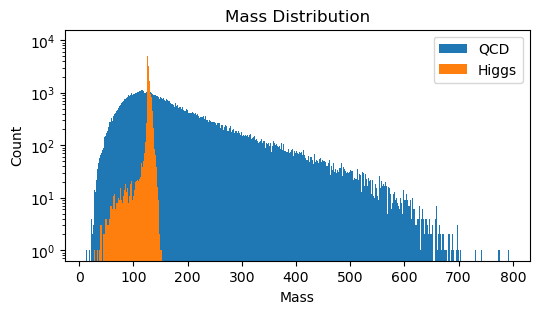

In [131]:
higgs_mass = higgs_data[:,3]
qcd_mass = qcd_data[:,3]
# a stacked histogram plot for the mass variable
plt.hist(qcd_mass, bins = 500, label = 'QCD') 
plt.hist(higgs_mass, bins = 500, label = 'Higgs') 
plt.xlabel('Mass') 
plt.ylabel('Count')
plt.yscale('log')
plt.title('Mass Distribution') 
plt.legend(loc = 'best')
plt.show()

In [132]:
higgs_hist = np.histogram(higgs_mass, bins = 200, weights = 50 * np.ones(len(higgs_mass)) / len(higgs_mass))
higgs_mode = higgs_hist[1][np.where(higgs_hist[0] == higgs_hist[0].max())]
print('The mode mass of higgs is',higgs_mode[0])

mu1 = np.mean(higgs_mass)
print('The mean mass of higgs is', mu1)

mu2 = np.mean(qcd_mass)
print('The mean mass of qcd is', mu2)

The mode mass of higgs is 124.94994843715949
The mean mass of higgs is 126.663832224776
The mean mass of qcd is 177.27313143544927


We can assume that the distribution of qcd and Higgs are both Poisson distribution, then N_qcd = 2000 and N_higgs = 50. Here, N_total = 2000+50 = 2050. Then, we use the 2050 and 2000 below to do the significance calculation using the Poisson statistics.

In [133]:
# exact significance calculation
sig = stats.norm.isf(stats.poisson.sf(2050, 2000))
print('The expected significance is' , sig)

The expected significance is 1.1282230087754423


In [134]:
# the approximation 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷)
print('𝑁_𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is {:.4f}'.format(50/np.sqrt(2000)))

𝑁_𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is 1.1180


With comparsion, We find the exact significance and the approximation from the equation are very close to each other, with a slight difference of 0.01.

From the central limit theorem, we can find that the Poisson distribution is cloase to the Gaussian distribution. Here, we can use 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) to approximate significance.

## part 2
Identify mass cuts to optimize the expected significance.

In [135]:
# upper boundary
cuts1 = np.linspace(120,max(higgs_mass),15)

for i in range(len(cuts1)):
    count1 = 0
    count2 = 0
    for j in range(len(higgs_mass)):
        if higgs_mass[j] <= cuts1[i]:
            count1 += 1
        if qcd_mass[j] <= cuts1[i]:
            count2 += 1
    print("mass cut: {:.2f}".format(cuts1[i])) 
    sig = (count1*100/100000)/(np.sqrt(count2*2000/100000))
    print("𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): {:.3f}".format(sig))
    i += 1  

mass cut: 120.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.158
mass cut: 122.47
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.187
mass cut: 124.94
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.313
mass cut: 127.42
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.132
mass cut: 129.89
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.832
mass cut: 132.36
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.100
mass cut: 134.83
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.277
mass cut: 137.31
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.315
mass cut: 139.78
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.295
mass cut: 142.25
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.261
mass cut: 144.72
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.221
mass cut: 147.20
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.180
mass cut: 149.67
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.141
mass cut: 152.14
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.101
mass cut: 154.61
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.066


In [136]:
# lower boundary
cuts2 = np.linspace(95,130,15)

for i in range(len(cuts2)):
    count3 = 0
    count4 = 0
    for j in range(len(higgs_mass)):
        if higgs_mass[j] >= cuts2[i]:
            count3 += 1
        if qcd_mass[j] >= cuts2[i]:
            count4 += 1
    sig = (count3*100/100000)/(np.sqrt(count4*2000/100000))
    print("mass cut: {:.2f}".format(cuts2[i])) 
    print("𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): {:.3f}".format(sig))
    i += 1

mass cut: 95.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.406
mass cut: 97.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.426
mass cut: 100.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.445
mass cut: 102.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.465
mass cut: 105.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.486
mass cut: 107.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.507
mass cut: 110.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.530
mass cut: 112.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.554
mass cut: 115.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.578
mass cut: 117.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.600
mass cut: 120.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.619
mass cut: 122.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.627
mass cut: 125.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.453
mass cut: 127.50
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 1.145
mass cut: 130.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.577


With comparsion, we find the set of mass cuts (122.52, 137.31) will return the highest significance. 

## part3）
Make two sets of stacked histogram plots for the rest features

Set A without any event selection
Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)

In [137]:
def pltFunct(num, keyName):
    plt.hist(higgs_data[:,num], bins=100, density=True, label='Higgs')
    plt.hist(qcd_data[:,num], bins=100, density=True, label='QCD')
    plt.legend()
    plt.xlabel(keyName)
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{keyName} distrubution')
    plt.show()

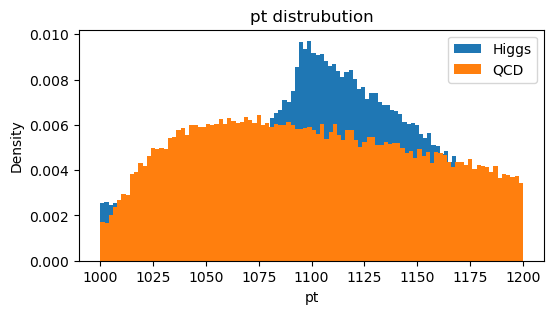

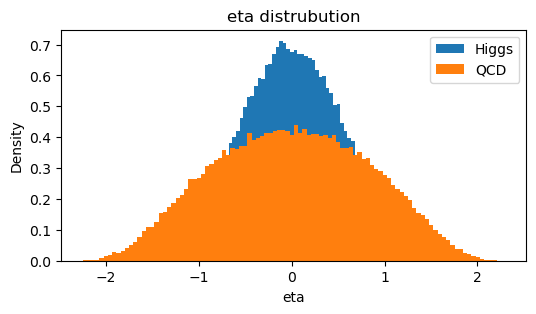

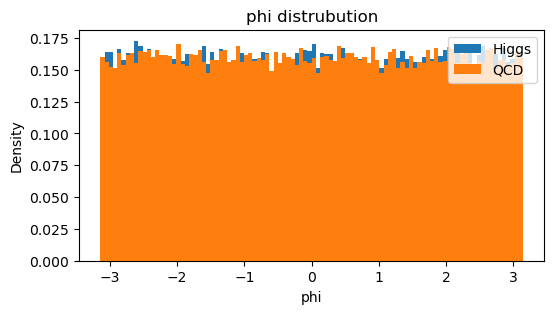

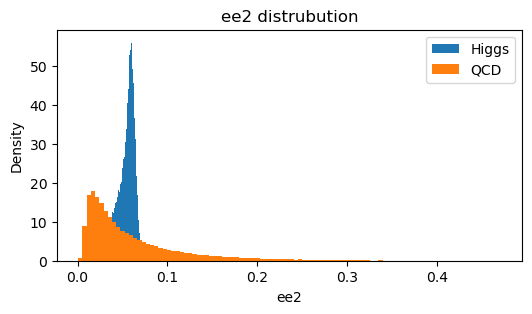

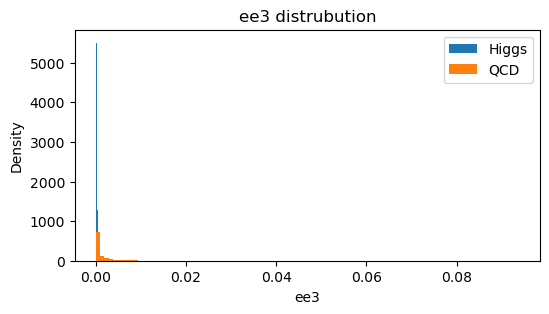

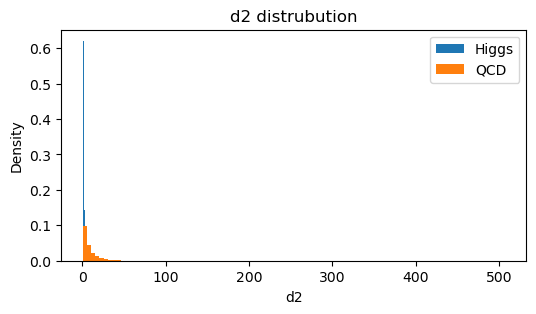

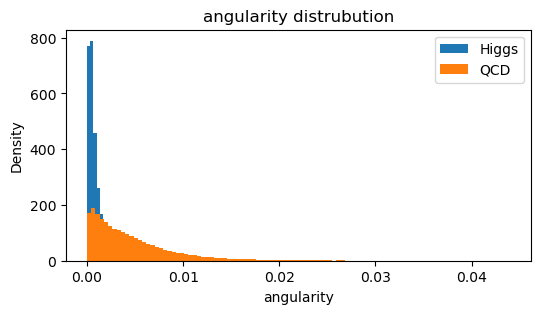

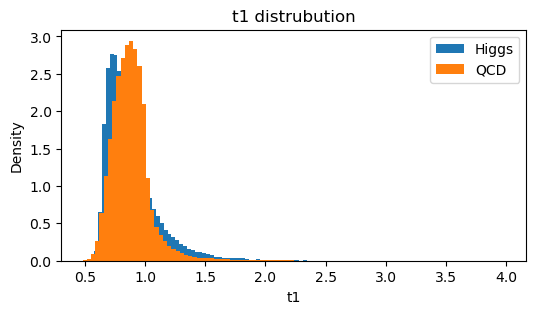

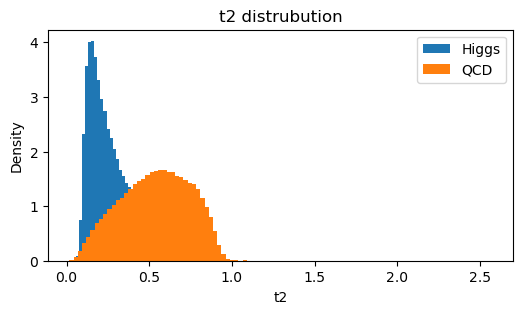

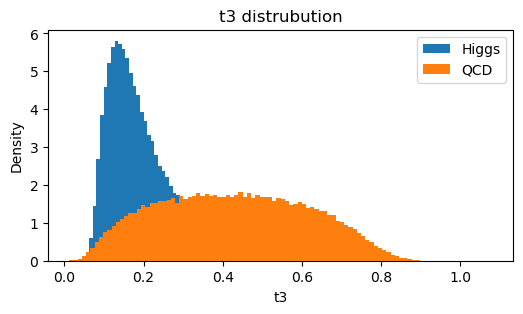

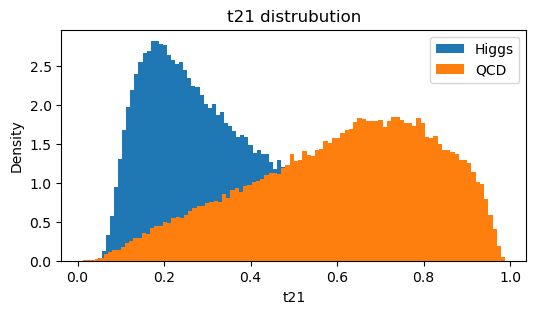

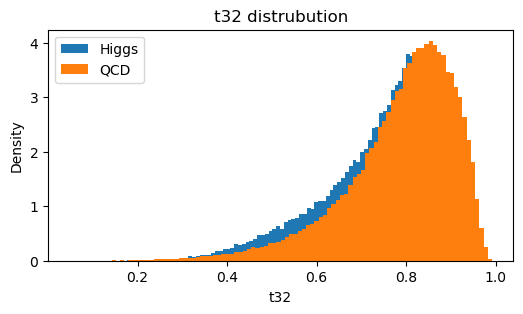

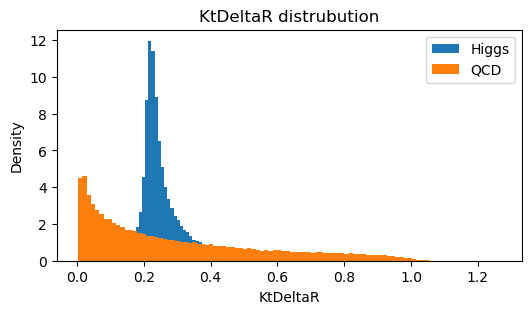

In [138]:
for i in range(14):
    if i != 3: #exclude mass feature
        key = table1.columns[i]
        pltFunct(i, table1.columns[i])

Set B with your optimal mass cuts
Can you identify another feature to further improve your expected signifiance?